In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import FuncFormatter

In [ ]:
%matplotlib inline

In [ ]:
#pip install jupyterthemes

In [ ]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [ ]:
!jt -t onedork  -T -N -kl

In [ ]:
#!jt -r

In [ ]:
df = pd.read_csv('clarity_measurements.csv')
df.head()

,Device ID,Time [UTC+00:00],PM1 1-Hour Mean Mass Concentration Calibrated [ug/m3],PM1 1-Hour Mean Mass Concentration Raw [ug/m3],PM1 1-Hour Mean Number Concentration [#/cm3],PM2.5 1-Hour Mean Mass Concentration Calibrated [ug/m3],PM2.5 1-Hour Mean Mass Concentration Raw [ug/m3],PM2.5 1-Hour Mean Number Concentration [#/cm3],PM2.5 NowCast Mass Concentration [ug/m3],PM2.5 NowCast AQI (US EPA),...,NO2 1-Hour Mean Concentration Raw [ppb],NO2 1-Hour Mean AQI (US EPA),NO2 1-Hour Mean AQI (WA DWER),O3 1-Hour Mean Concentration Raw [ppb],Temperature Internal 1-Hour Mean [degC],Rel. Humidity Internal 1-Hour Mean [%],Wind Speed 1-Hour Mean [m/s],Wind Direction 1-Hour Mean [degrees],latitude,longitude
0,A5S33FLL,2021-11-07T07:00:00.000Z,NaN,35.92,90.25,24.07,54.11,95.03,33.12,95.0,...,31.26,37.0,32.0,NaN,28.09,83.94,NaN,NaN,6.612873,3.360596
1,A69P6T3W,2021-11-07T07:00:00.000Z,NaN,30.86,75.51,20.38,47.60,79.61,37.03,105.0,...,18.91,29.0,26.0,NaN,28.40,83.40,NaN,NaN,6.612873,3.360596
2,A5S33FLL,2021-11-07T06:00:00.000Z,NaN,60.65,150.14,37.17,95.96,158.85,29.06,87.0,...,54.28,33.0,29.0,NaN,25.78,90.45,NaN,NaN,6.612873,3.360596
3,A69P6T3W,2021-11-07T06:00:00.000Z,NaN,62.85,157.99,43.06,99.28,167.14,30.98,91.0,...,38.81,28.0,25.0,NaN,25.67,90.73,NaN,NaN,6.612873,3.360596
4,A5S33FLL,2021-11-07T05:00:00.000Z,NaN,52.93,136.22,30.67,78.72,142.74,27.43,83.0,...,45.48,19.0,17.0,NaN,25.14,90.40,NaN,NaN,6.612873,3.360596


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 32 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Device ID                                                         1056 non-null   object 
 1   Time [UTC+00:00]                                                  1056 non-null   object 
 2   PM1 1-Hour Mean Mass Concentration Calibrated [ug/m3]             0 non-null      float64
 3   PM1 1-Hour Mean Mass Concentration Raw [ug/m3]                    1052 non-null   float64
 4   PM1 1-Hour Mean Number Concentration [#/cm3]                      1052 non-null   float64
 5   PM2.5 1-Hour Mean Mass Concentration Calibrated [ug/m3]           1052 non-null   float64
 6   PM2.5 1-Hour Mean Mass Concentration Raw [ug/m3]                  1052 non-null   float64
 7   PM2.5 1-Hour Mean Number Concentr

In [ ]:
import os

In [ ]:
os.getcwd()

'C:\\Users\\orji\\Downloads\\My_work\\air_quality_boxplots'

In [ ]:
clarity = df[['Device ID', 'Time [UTC+00:00]', 'PM2.5 1-Hour Mean Mass Concentration Calibrated [ug/m3]',
            'PM2.5 1-Hour Mean Mass Concentration Raw [ug/m3]','NO2 1-Hour Mean Concentration Raw [ppb]',
            'NO2 1-Hour Mean Concentration Calibrated [ppb]']]
print(clarity.info())
clarity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Device ID                                                1056 non-null   object 
 1   Time [UTC+00:00]                                         1056 non-null   object 
 2   PM2.5 1-Hour Mean Mass Concentration Calibrated [ug/m3]  1052 non-null   float64
 3   PM2.5 1-Hour Mean Mass Concentration Raw [ug/m3]         1052 non-null   float64
 4   NO2 1-Hour Mean Concentration Raw [ppb]                  1052 non-null   float64
 5   NO2 1-Hour Mean Concentration Calibrated [ppb]           1052 non-null   float64
dtypes: float64(4), object(2)
memory usage: 49.6+ KB
None


,Device ID,Time [UTC+00:00],PM2.5 1-Hour Mean Mass Concentration Calibrated [ug/m3],PM2.5 1-Hour Mean Mass Concentration Raw [ug/m3],NO2 1-Hour Mean Concentration Raw [ppb],NO2 1-Hour Mean Concentration Calibrated [ppb]
0,A5S33FLL,2021-11-07T07:00:00.000Z,24.07,54.11,31.26,38.99
1,A69P6T3W,2021-11-07T07:00:00.000Z,20.38,47.60,18.91,30.73
2,A5S33FLL,2021-11-07T06:00:00.000Z,37.17,95.96,54.28,34.85
3,A69P6T3W,2021-11-07T06:00:00.000Z,43.06,99.28,38.81,29.50
4,A5S33FLL,2021-11-07T05:00:00.000Z,30.67,78.72,45.48,20.53


In [ ]:
clarity.columns = ['Device_ID', 'Time', 'PM2.5_Calibrated','PM2.5_Raw','NO2_Raw','NO2_Calibrated']
clarity.tail()

,Device_ID,Time,PM2.5_Calibrated,PM2.5_Raw,NO2_Raw,NO2_Calibrated
1051,A69P6T3W,2021-10-16T10:00:00.000Z,7.95,19.24,-34.87,11.26
1052,A5S33FLL,2021-10-16T09:00:00.000Z,9.19,25.17,-21.89,20.11
1053,A69P6T3W,2021-10-16T09:00:00.000Z,8.54,27.37,-12.02,19.52
1054,A5S33FLL,2021-10-16T08:00:00.000Z,12.60,32.29,-13.36,17.54
1055,A69P6T3W,2021-10-16T08:00:00.000Z,15.13,34.78,-2.74,23.57


In [ ]:
clarity['Date'] = clarity['Time'].str[:10]
clarity['new_time'] = clarity['Time'].str[11:19]
clarity.tail()

<ipython-input-13-13354a959421>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clarity['Date'] = clarity['Time'].str[:10]
<ipython-input-13-13354a959421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clarity['new_time'] = clarity['Time'].str[11:19]


,Device_ID,Time,PM2.5_Calibrated,PM2.5_Raw,NO2_Raw,NO2_Calibrated,Date,new_time
1051,A69P6T3W,2021-10-16T10:00:00.000Z,7.95,19.24,-34.87,11.26,2021-10-16,10:00:00
1052,A5S33FLL,2021-10-16T09:00:00.000Z,9.19,25.17,-21.89,20.11,2021-10-16,09:00:00
1053,A69P6T3W,2021-10-16T09:00:00.000Z,8.54,27.37,-12.02,19.52,2021-10-16,09:00:00
1054,A5S33FLL,2021-10-16T08:00:00.000Z,12.60,32.29,-13.36,17.54,2021-10-16,08:00:00
1055,A69P6T3W,2021-10-16T08:00:00.000Z,15.13,34.78,-2.74,23.57,2021-10-16,08:00:00


In [ ]:
clarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Device_ID         1056 non-null   object 
 1   Time              1056 non-null   object 
 2   PM2.5_Calibrated  1052 non-null   float64
 3   PM2.5_Raw         1052 non-null   float64
 4   NO2_Raw           1052 non-null   float64
 5   NO2_Calibrated    1052 non-null   float64
 6   Date              1056 non-null   object 
 7   new_time          1056 non-null   object 
dtypes: float64(4), object(4)
memory usage: 66.1+ KB


In [ ]:
clarity['Date'] = pd.to_datetime(clarity['Date'])
clarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Device_ID         1056 non-null   object        
 1   Time              1056 non-null   object        
 2   PM2.5_Calibrated  1052 non-null   float64       
 3   PM2.5_Raw         1052 non-null   float64       
 4   NO2_Raw           1052 non-null   float64       
 5   NO2_Calibrated    1052 non-null   float64       
 6   Date              1056 non-null   datetime64[ns]
 7   new_time          1056 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 66.1+ KB


<ipython-input-15-2188a98e0053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clarity['Date'] = pd.to_datetime(clarity['Date'])


In [ ]:
clarity['Datetime'] = pd.to_datetime(clarity['Date'].apply(str)+' '+clarity['new_time'])
clarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Device_ID         1056 non-null   object        
 1   Time              1056 non-null   object        
 2   PM2.5_Calibrated  1052 non-null   float64       
 3   PM2.5_Raw         1052 non-null   float64       
 4   NO2_Raw           1052 non-null   float64       
 5   NO2_Calibrated    1052 non-null   float64       
 6   Date              1056 non-null   datetime64[ns]
 7   new_time          1056 non-null   object        
 8   Datetime          1056 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 74.4+ KB


<ipython-input-16-7b00af381da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clarity['Datetime'] = pd.to_datetime(clarity['Date'].apply(str)+' '+clarity['new_time'])


In [ ]:
clarit = clarity[['Device_ID', 'Datetime', 'PM2.5_Calibrated', 'PM2.5_Raw', 'NO2_Calibrated', 'NO2_Raw']]
print(clarit.info())
clarit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Device_ID         1056 non-null   object        
 1   Datetime          1056 non-null   datetime64[ns]
 2   PM2.5_Calibrated  1052 non-null   float64       
 3   PM2.5_Raw         1052 non-null   float64       
 4   NO2_Calibrated    1052 non-null   float64       
 5   NO2_Raw           1052 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 49.6+ KB
None


,Device_ID,Datetime,PM2.5_Calibrated,PM2.5_Raw,NO2_Calibrated,NO2_Raw
0,A5S33FLL,2021-11-07 07:00:00,24.07,54.11,38.99,31.26
1,A69P6T3W,2021-11-07 07:00:00,20.38,47.60,30.73,18.91
2,A5S33FLL,2021-11-07 06:00:00,37.17,95.96,34.85,54.28
3,A69P6T3W,2021-11-07 06:00:00,43.06,99.28,29.50,38.81
4,A5S33FLL,2021-11-07 05:00:00,30.67,78.72,20.53,45.48


In [ ]:
clarit.Device_ID.value_counts()

A69P6T3W    528
A5S33FLL    528
Name: Device_ID, dtype: int64

In [ ]:
dt = pd.read_csv('AQM65_17112020-806.csv', skiprows=6)
dt.head()

,Time,CO (ppm),CO2 (ppm),H2S (ppm),NO2 (ppm),NOx (ppm),O3 (ppm),VOC (ppm),SO2 (ppm),PM2.5 (µg/m³),MFC S (mL/min),MFM Z (mL/min),ITEMP (°C),TEMP (°C),RH (%)
0,2021/10/16 00:00:00,1.608,275,0.002,0.043,0.106,0.004,0.018,-0.006,12.32,0.02,0.0,30.0,27.81,79.4
1,2021/10/16 01:00:00,1.538,282,-0.003,0.038,0.080,0.004,0.017,-0.006,12.62,0.02,0.0,30.0,27.59,81.6
2,2021/10/16 02:00:00,1.055,244,-0.004,0.031,0.067,0.005,0.017,-0.006,7.73,0.02,0.0,30.0,27.58,81.4
3,2021/10/16 03:00:00,0.971,248,-0.004,0.039,0.097,0.004,0.017,-0.006,8.99,0.02,0.0,30.0,27.65,82.0
4,2021/10/16 04:00:00,1.007,265,-0.004,0.035,0.081,0.004,0.018,-0.006,7.24,0.02,0.0,30.0,27.58,83.1


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            552 non-null    object 
 1   CO (ppm)        552 non-null    float64
 2   CO2 (ppm)       552 non-null    int64  
 3   H2S (ppm)       552 non-null    float64
 4   NO2 (ppm)       552 non-null    float64
 5   NOx (ppm)       552 non-null    float64
 6   O3 (ppm)        552 non-null    float64
 7   VOC (ppm)       552 non-null    float64
 8   SO2 (ppm)       552 non-null    float64
 9   PM2.5 (µg/m³)   552 non-null    float64
 10  MFC S (mL/min)  552 non-null    float64
 11  MFM Z (mL/min)  552 non-null    float64
 12  ITEMP (°C)      552 non-null    float64
 13  TEMP (°C)       552 non-null    float64
 14  RH (%)          552 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 64.8+ KB


In [ ]:
dt['Datetime'] = pd.to_datetime(dt['Time'])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            552 non-null    object        
 1   CO (ppm)        552 non-null    float64       
 2   CO2 (ppm)       552 non-null    int64         
 3   H2S (ppm)       552 non-null    float64       
 4   NO2 (ppm)       552 non-null    float64       
 5   NOx (ppm)       552 non-null    float64       
 6   O3 (ppm)        552 non-null    float64       
 7   VOC (ppm)       552 non-null    float64       
 8   SO2 (ppm)       552 non-null    float64       
 9   PM2.5 (µg/m³)   552 non-null    float64       
 10  MFC S (mL/min)  552 non-null    float64       
 11  MFM Z (mL/min)  552 non-null    float64       
 12  ITEMP (°C)      552 non-null    float64       
 13  TEMP (°C)       552 non-null    float64       
 14  RH (%)          552 non-null    float64       
 15  Dateti

In [ ]:
dt.head()

,Time,CO (ppm),CO2 (ppm),H2S (ppm),NO2 (ppm),NOx (ppm),O3 (ppm),VOC (ppm),SO2 (ppm),PM2.5 (µg/m³),MFC S (mL/min),MFM Z (mL/min),ITEMP (°C),TEMP (°C),RH (%),Datetime
0,2021/10/16 00:00:00,1.608,275,0.002,0.043,0.106,0.004,0.018,-0.006,12.32,0.02,0.0,30.0,27.81,79.4,2021-10-16 00:00:00
1,2021/10/16 01:00:00,1.538,282,-0.003,0.038,0.080,0.004,0.017,-0.006,12.62,0.02,0.0,30.0,27.59,81.6,2021-10-16 01:00:00
2,2021/10/16 02:00:00,1.055,244,-0.004,0.031,0.067,0.005,0.017,-0.006,7.73,0.02,0.0,30.0,27.58,81.4,2021-10-16 02:00:00
3,2021/10/16 03:00:00,0.971,248,-0.004,0.039,0.097,0.004,0.017,-0.006,8.99,0.02,0.0,30.0,27.65,82.0,2021-10-16 03:00:00
4,2021/10/16 04:00:00,1.007,265,-0.004,0.035,0.081,0.004,0.018,-0.006,7.24,0.02,0.0,30.0,27.58,83.1,2021-10-16 04:00:00


In [ ]:
eroqual = dt[['Datetime', 'NO2 (ppm)', 'PM2.5 (µg/m³)']]
print(eroqual.info())
eroqual.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       552 non-null    datetime64[ns]
 1   NO2 (ppm)      552 non-null    float64       
 2   PM2.5 (µg/m³)  552 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 13.1 KB
None


,Datetime,NO2 (ppm),PM2.5 (µg/m³)
0,2021-10-16 00:00:00,0.043,12.32
1,2021-10-16 01:00:00,0.038,12.62
2,2021-10-16 02:00:00,0.031,7.73
3,2021-10-16 03:00:00,0.039,8.99
4,2021-10-16 04:00:00,0.035,7.24


In [ ]:
clarity_A5S33FLL = clarit.loc[clarit['Device_ID'] == 'A5S33FLL']

print(clarity_A5S33FLL.info())
clarity_A5S33FLL.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 1054
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Device_ID         528 non-null    object        
 1   Datetime          528 non-null    datetime64[ns]
 2   PM2.5_Calibrated  526 non-null    float64       
 3   PM2.5_Raw         526 non-null    float64       
 4   NO2_Calibrated    526 non-null    float64       
 5   NO2_Raw           526 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 28.9+ KB
None


,Device_ID,Datetime,PM2.5_Calibrated,PM2.5_Raw,NO2_Calibrated,NO2_Raw
0,A5S33FLL,2021-11-07 07:00:00,24.07,54.11,38.99,31.26
2,A5S33FLL,2021-11-07 06:00:00,37.17,95.96,34.85,54.28
4,A5S33FLL,2021-11-07 05:00:00,30.67,78.72,20.53,45.48
6,A5S33FLL,2021-11-07 04:00:00,29.31,72.77,23.02,47.02
8,A5S33FLL,2021-11-07 03:00:00,25.37,59.31,25.81,46.20


In [ ]:
clarity_A5S33FLL[clarity_A5S33FLL.NO2_Calibrated.isna()]

,Device_ID,Datetime,PM2.5_Calibrated,PM2.5_Raw,NO2_Calibrated,NO2_Raw
24,A5S33FLL,2021-11-06 19:00:00,NaN,NaN,NaN,NaN
28,A5S33FLL,2021-11-06 17:00:00,NaN,NaN,NaN,NaN


In [ ]:
clarity_A5S33FLL.dropna(inplace=True)
clarity_A5S33FLL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 1054
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Device_ID         526 non-null    object        
 1   Datetime          526 non-null    datetime64[ns]
 2   PM2.5_Calibrated  526 non-null    float64       
 3   PM2.5_Raw         526 non-null    float64       
 4   NO2_Calibrated    526 non-null    float64       
 5   NO2_Raw           526 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 28.8+ KB


<ipython-input-26-dcbc6432e1e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clarity_A5S33FLL.dropna(inplace=True)


In [ ]:
clarity_A5S33FLL = clarity_A5S33FLL.sort_values('Datetime')

eroqual = eroqual.sort_values('Datetime')

print(eroqual.tail())
clarity_A5S33FLL.tail()

               Datetime  NO2 (ppm)  PM2.5 (µg/m³)
547 2021-11-07 19:00:00      0.066          13.41
548 2021-11-07 20:00:00      0.061          19.93
549 2021-11-07 21:00:00      0.058          20.81
550 2021-11-07 22:00:00      0.056          29.76
551 2021-11-07 23:00:00      0.050          25.14


,Device_ID,Datetime,PM2.5_Calibrated,PM2.5_Raw,NO2_Calibrated,NO2_Raw
8,A5S33FLL,2021-11-07 03:00:00,25.37,59.31,25.81,46.20
6,A5S33FLL,2021-11-07 04:00:00,29.31,72.77,23.02,47.02
4,A5S33FLL,2021-11-07 05:00:00,30.67,78.72,20.53,45.48
2,A5S33FLL,2021-11-07 06:00:00,37.17,95.96,34.85,54.28
0,A5S33FLL,2021-11-07 07:00:00,24.07,54.11,38.99,31.26


In [ ]:
A5S33FLL_merge = pd.merge(clarity_A5S33FLL, eroqual, how='inner')

print(A5S33FLL_merge.info())
A5S33FLL_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Device_ID         526 non-null    object        
 1   Datetime          526 non-null    datetime64[ns]
 2   PM2.5_Calibrated  526 non-null    float64       
 3   PM2.5_Raw         526 non-null    float64       
 4   NO2_Calibrated    526 non-null    float64       
 5   NO2_Raw           526 non-null    float64       
 6   NO2 (ppm)         526 non-null    float64       
 7   PM2.5 (µg/m³)     526 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 37.0+ KB
None


,Device_ID,Datetime,PM2.5_Calibrated,PM2.5_Raw,NO2_Calibrated,NO2_Raw,NO2 (ppm),PM2.5 (µg/m³)
0,A5S33FLL,2021-10-16 08:00:00,12.60,32.29,17.54,-13.36,0.046,7.23
1,A5S33FLL,2021-10-16 09:00:00,9.19,25.17,20.11,-21.89,0.033,3.32
2,A5S33FLL,2021-10-16 10:00:00,7.57,18.97,14.22,-48.83,0.029,1.60
3,A5S33FLL,2021-10-16 11:00:00,7.66,15.34,14.74,-41.22,0.017,0.19
4,A5S33FLL,2021-10-16 12:00:00,7.32,17.43,27.57,2.54,0.024,0.90


In [ ]:
clarity_A69P6T3W = clarit.loc[clarit['Device_ID'] == 'A69P6T3W']

print(clarity_A69P6T3W.info())
clarity_A69P6T3W.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 1 to 1055
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Device_ID         528 non-null    object        
 1   Datetime          528 non-null    datetime64[ns]
 2   PM2.5_Calibrated  526 non-null    float64       
 3   PM2.5_Raw         526 non-null    float64       
 4   NO2_Calibrated    526 non-null    float64       
 5   NO2_Raw           526 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 28.9+ KB
None


,Device_ID,Datetime,PM2.5_Calibrated,PM2.5_Raw,NO2_Calibrated,NO2_Raw
1,A69P6T3W,2021-11-07 07:00:00,20.38,47.60,30.73,18.91
3,A69P6T3W,2021-11-07 06:00:00,43.06,99.28,29.50,38.81
5,A69P6T3W,2021-11-07 05:00:00,32.01,78.53,21.34,31.67
7,A69P6T3W,2021-11-07 04:00:00,33.01,75.37,24.48,34.26
9,A69P6T3W,2021-11-07 03:00:00,25.92,60.78,25.25,33.33


In [ ]:
clarity_A69P6T3W[clarity_A69P6T3W.NO2_Calibrated.isna()]

,Device_ID,Datetime,PM2.5_Calibrated,PM2.5_Raw,NO2_Calibrated,NO2_Raw
607,A69P6T3W,2021-10-25 16:00:00,NaN,NaN,NaN,NaN
609,A69P6T3W,2021-10-25 15:00:00,NaN,NaN,NaN,NaN


In [ ]:
clarity_A69P6T3W.dropna(inplace=True)
clarity_A69P6T3W.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 1 to 1055
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Device_ID         526 non-null    object        
 1   Datetime          526 non-null    datetime64[ns]
 2   PM2.5_Calibrated  526 non-null    float64       
 3   PM2.5_Raw         526 non-null    float64       
 4   NO2_Calibrated    526 non-null    float64       
 5   NO2_Raw           526 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 28.8+ KB


<ipython-input-31-9da8cde6d839>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clarity_A69P6T3W.dropna(inplace=True)


In [ ]:
clarity_A69P6T3W = clarity_A69P6T3W.sort_values('Datetime')

eroqual = eroqual.sort_values('Datetime')

print(eroqual.tail())
clarity_A69P6T3W.tail()

               Datetime  NO2 (ppm)  PM2.5 (µg/m³)
547 2021-11-07 19:00:00      0.066          13.41
548 2021-11-07 20:00:00      0.061          19.93
549 2021-11-07 21:00:00      0.058          20.81
550 2021-11-07 22:00:00      0.056          29.76
551 2021-11-07 23:00:00      0.050          25.14


,Device_ID,Datetime,PM2.5_Calibrated,PM2.5_Raw,NO2_Calibrated,NO2_Raw
9,A69P6T3W,2021-11-07 03:00:00,25.92,60.78,25.25,33.33
7,A69P6T3W,2021-11-07 04:00:00,33.01,75.37,24.48,34.26
5,A69P6T3W,2021-11-07 05:00:00,32.01,78.53,21.34,31.67
3,A69P6T3W,2021-11-07 06:00:00,43.06,99.28,29.50,38.81
1,A69P6T3W,2021-11-07 07:00:00,20.38,47.60,30.73,18.91


In [ ]:
'''Other methods
(1) - merge two dataframes with common columns
#pd.merge(df1, df2, on="movie_title")

(2) - merge two dataframes with common columns but diff column_name
#dfinal = df1.merge(df2, how='inner', left_on='movie_title', right_on='movie_name')
'''

A69P6T3W_merge = pd.merge(clarity_A69P6T3W, eroqual, how='inner')

print(A69P6T3W_merge.info())
A69P6T3W_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Device_ID         526 non-null    object        
 1   Datetime          526 non-null    datetime64[ns]
 2   PM2.5_Calibrated  526 non-null    float64       
 3   PM2.5_Raw         526 non-null    float64       
 4   NO2_Calibrated    526 non-null    float64       
 5   NO2_Raw           526 non-null    float64       
 6   NO2 (ppm)         526 non-null    float64       
 7   PM2.5 (µg/m³)     526 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 37.0+ KB
None


,Device_ID,Datetime,PM2.5_Calibrated,PM2.5_Raw,NO2_Calibrated,NO2_Raw,NO2 (ppm),PM2.5 (µg/m³)
0,A69P6T3W,2021-10-16 08:00:00,15.13,34.78,23.57,-2.74,0.046,7.23
1,A69P6T3W,2021-10-16 09:00:00,8.54,27.37,19.52,-12.02,0.033,3.32
2,A69P6T3W,2021-10-16 10:00:00,7.95,19.24,11.26,-34.87,0.029,1.60
3,A69P6T3W,2021-10-16 11:00:00,6.83,16.56,18.85,-28.03,0.017,0.19
4,A69P6T3W,2021-10-16 12:00:00,4.78,15.76,24.91,4.51,0.024,0.90


In [ ]:
A69P6T3W_merge['NO2 (ppb)'] = A69P6T3W_merge['NO2 (ppm)'] * 1000

A5S33FLL_merge['NO2 (ppb)'] = A5S33FLL_merge['NO2 (ppm)'] * 1000

In [ ]:
print(A69P6T3W_merge.tail())

A5S33FLL_merge.tail()

    Device_ID            Datetime  PM2.5_Calibrated  PM2.5_Raw  \
521  A69P6T3W 2021-11-07 03:00:00             25.92      60.78   
522  A69P6T3W 2021-11-07 04:00:00             33.01      75.37   
523  A69P6T3W 2021-11-07 05:00:00             32.01      78.53   
524  A69P6T3W 2021-11-07 06:00:00             43.06      99.28   
525  A69P6T3W 2021-11-07 07:00:00             20.38      47.60   

     NO2_Calibrated  NO2_Raw  NO2 (ppm)  PM2.5 (µg/m³)  NO2 (ppb)  
521           25.25    33.33      0.033          20.26       33.0  
522           24.48    34.26      0.025          17.46       25.0  
523           21.34    31.67      0.024          24.44       24.0  
524           29.50    38.81      0.019          24.68       19.0  
525           30.73    18.91      0.037          27.13       37.0  


,Device_ID,Datetime,PM2.5_Calibrated,PM2.5_Raw,NO2_Calibrated,NO2_Raw,NO2 (ppm),PM2.5 (µg/m³),NO2 (ppb)
521,A5S33FLL,2021-11-07 03:00:00,25.37,59.31,25.81,46.20,0.033,20.26,33.0
522,A5S33FLL,2021-11-07 04:00:00,29.31,72.77,23.02,47.02,0.025,17.46,25.0
523,A5S33FLL,2021-11-07 05:00:00,30.67,78.72,20.53,45.48,0.024,24.44,24.0
524,A5S33FLL,2021-11-07 06:00:00,37.17,95.96,34.85,54.28,0.019,24.68,19.0
525,A5S33FLL,2021-11-07 07:00:00,24.07,54.11,38.99,31.26,0.037,27.13,37.0


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('ggplot')

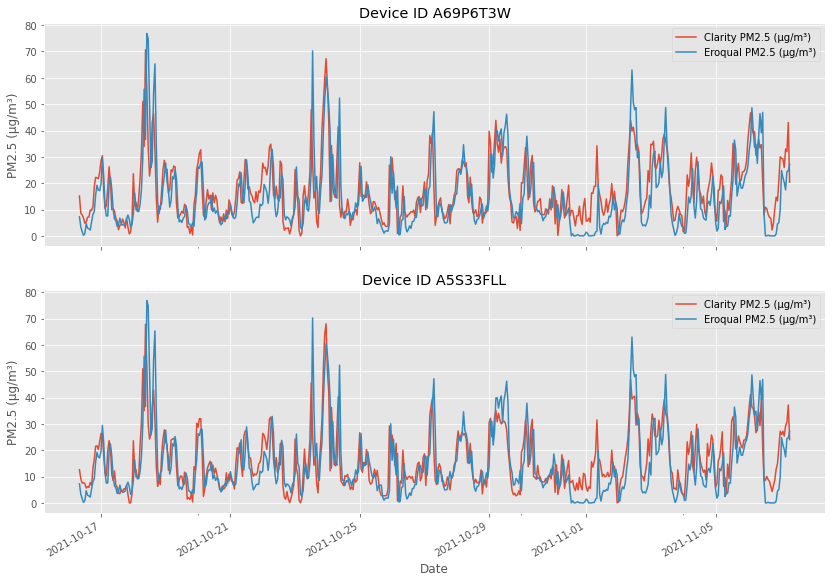

In [ ]:
fig, (ax0,ax1) = plt.subplots(2,1, sharex=True, figsize=(14,10))
A69P6T3W_merge.plot(x="Datetime", y=["PM2.5_Calibrated", "PM2.5 (µg/m³)"], ax=ax0)
ax0.set(title='Device ID A69P6T3W', xlabel='', ylabel='PM2.5 (µg/m³)')
ax0.legend(['Clarity PM2.5 (µg/m³)','Eroqual PM2.5 (µg/m³)'])

A5S33FLL_merge.plot(x="Datetime", y=["PM2.5_Calibrated", "PM2.5 (µg/m³)"], ax=ax1)
ax1.set(title='Device ID A5S33FLL', xlabel='Date', ylabel='PM2.5 (µg/m³)')
ax1.legend(['Clarity PM2.5 (µg/m³)','Eroqual PM2.5 (µg/m³)'])

#ax1.legend().set_visible(False)

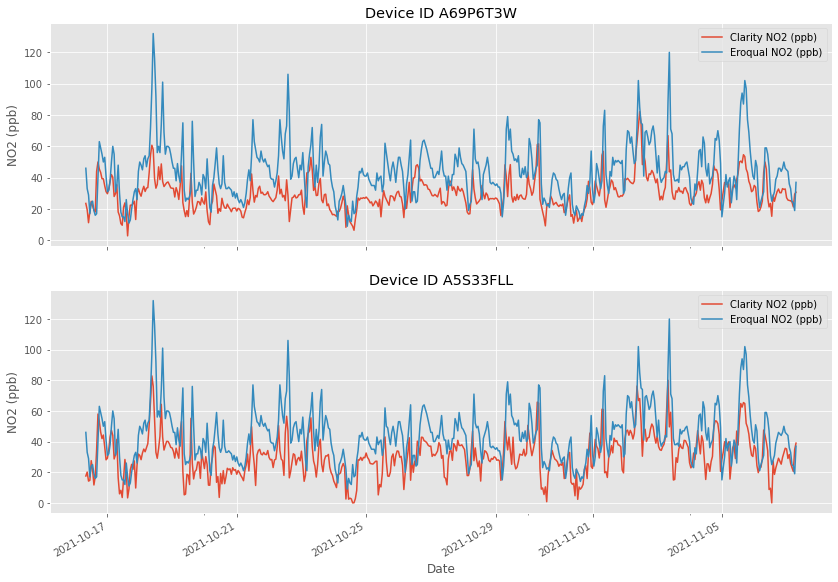

In [ ]:
fig, (ax0,ax1) = plt.subplots(2,1, sharex=True, figsize=(14,10))
A69P6T3W_merge.plot(x="Datetime", y=["NO2_Calibrated", "NO2 (ppb)"], ax=ax0)
ax0.set(title='Device ID A69P6T3W', xlabel='', ylabel='NO2 (ppb)')
ax0.legend(['Clarity NO2 (ppb)','Eroqual NO2 (ppb)'])

A5S33FLL_merge.plot(x="Datetime", y=["NO2_Calibrated", "NO2 (ppb)"], ax=ax1)
ax1.set(title='Device ID A5S33FLL', xlabel='Date', ylabel='NO2 (ppb)')
ax1.legend(['Clarity NO2 (ppb)','Eroqual NO2 (ppb)'])

#ax1.legend().set_visible(False)

Text(0.5, 0.98, 'Eroqual Clarity Device Colocation')

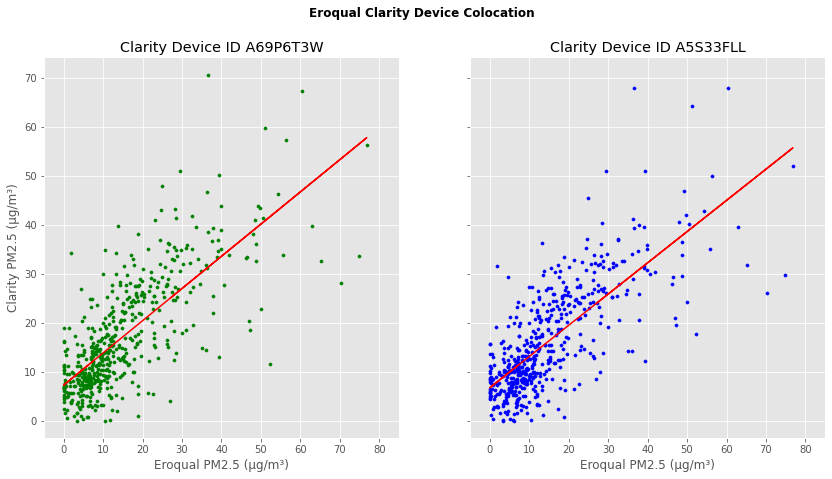

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, figsize=(14,7))
A69P6T3W_merge.plot.scatter(x="PM2.5 (µg/m³)", y="PM2.5_Calibrated", marker='o', color='g',
                            s=10, ax=ax0)
ax0.set(title='Clarity Device ID A69P6T3W', xlabel='Eroqual PM2.5 (µg/m³)', ylabel='Clarity PM2.5 (µg/m³)')
ax0.set_xlim([-5, 85])
a = np.array(A69P6T3W_merge["PM2.5 (µg/m³)"])
e = np.array(A69P6T3W_merge["PM2.5_Calibrated"])
m, b = np.polyfit(a, e, 1)
ax0.plot(a, m*a+b, c='r', label='y={:.2f}x+{:.2f}'.format(m,b))


#ax0.legend(['Clarity PM2.5 (µg/m³)','Eroqual PM2.5 (µg/m³)'])

A5S33FLL_merge.plot.scatter(x="PM2.5 (µg/m³)", y="PM2.5_Calibrated", marker='o', color='blue',
                            s=10, ax=ax1)
ax1.set(title='Clarity Device ID A5S33FLL', xlabel='Eroqual PM2.5 (µg/m³)', ylabel='')
ax1.set_xlim([-5, 85])
x = np.array(A5S33FLL_merge["PM2.5 (µg/m³)"])
y = np.array(A5S33FLL_merge["PM2.5_Calibrated"])
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x+b, c='r', )

#ax1.legend(['Clarity PM2.5 (µg/m³)','Eroqual PM2.5 (µg/m³)'])

fig.suptitle('Eroqual Clarity Device Colocation', fontsize=12, fontweight='bold')

#ax1.legend().set_visible(False)